## ML Project : 4 (Keras Tutorial)

In [239]:
#install required libraries
import pandas as pd
import numpy as np

#data visualization packages
import matplotlib.pyplot as plt

#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

#other packages
import time as time
from IPython.display import display, Markdown
from IPython.display import display
from time import sleep
from IPython.display import Markdown as md

## MNIST Fashion Dataset

The dataset used is a dataset of Zalando's article images 28x28 grayscale images of 10 fashion categories, consisting of a training set of 60,000 images along with a test set of 10,000 images. <br>

The input images are of the shape 28X28 which we reshape to a single vector of length 784. The values defining the image range from 0 to 255, we have used the min max scaler to scale them between 0 and 1.<br><br>

The class labels are:
<table class="tg">
  <tr>
    <th class="tg-0lax">Label</th>
    <th class="tg-0lax">Description</th>
  </tr>
  <tr>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">T-shirt/top</td>
  </tr>
  <tr>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Trouser</td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Pullover</td>
  </tr>
  <tr>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">Dress</td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">Coat</td>
  </tr>
  <tr>
    <td class="tg-0lax">5</td>
    <td class="tg-0lax">Sandal</td>
  </tr>
  <tr>
    <td class="tg-0lax">6</td>
    <td class="tg-0lax">Shirt</td>
  </tr>
  <tr>
    <td class="tg-0lax">7</td>
    <td class="tg-0lax">Sneaker</td>
  </tr>
  <tr>
    <td class="tg-0lax">8</td>
    <td class="tg-0lax">Bag</td>
  </tr>
  <tr>
    <td class="tg-0lax">9</td>
    <td class="tg-0lax">Ankle boot</td>
  </tr>
</table>


In [240]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Data Preparation

In [241]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [242]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

#fit and transform training dataset
X_train = minmax.fit_transform(X_train)

#transform testing dataset
X_test = minmax.transform(X_test)

In [243]:
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


### Data Visualization

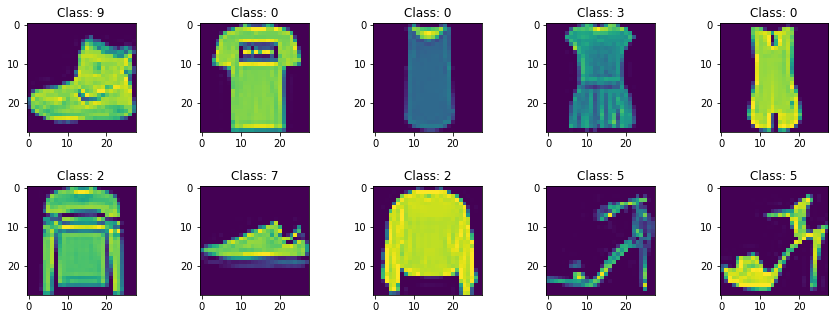

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          #create subplot
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))                        #print image
    ax[i].title.set_text('Class: ' + str(y_train[i]))              #print class
plt.subplots_adjust(hspace=0.5)                                    #increase horizontal space
plt.show()                                                         #display image

## Neural Network Model

We have implemented the sequential model as our neural network model. The sequential model is a linear stack of layers, we have added layers to the network by using the .add() method. <br><br>
kernel_initializer defines which statistical distribution or function to use for initialising the weights. In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights. In our code above we have used uniform distribution to initialize the weights. <br><br>
In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input. The rectified linear activation (Relu) function is a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero. The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.<br><br>
The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true. The class with the highest probability is chosen as the output.
<br>

### Neural Network (1 Dense Layer): 
<br>
<img src="1 dense.png" alt="drawing" width="600"/>


In [16]:
#initializing CNN model
classifier_e25 = Sequential()

#add 1st hidden layer
classifier_e25.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))

#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

## Compiling ANN Model

<b>Optimization</b> is the task of searching for parameters that minimize our loss function. We open use categorical crossentropy  when it is a multiclass classification task.<br> <b>Cross entropy</b> is a loss function, used to measure the dissimilarity between the distribution of observed class labels and the predicted probabilities of class membership.<br>In our model we have impemeneted <b>sparse categorical crossentropy</b> since we have intergers numbered from 0-9 as our class labels. We have implemeneted <b>Adam</b> which is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data.

In [17]:
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_e25.summary()

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Training ANN Model

<br>Training is completed! Total training time: **88.958 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

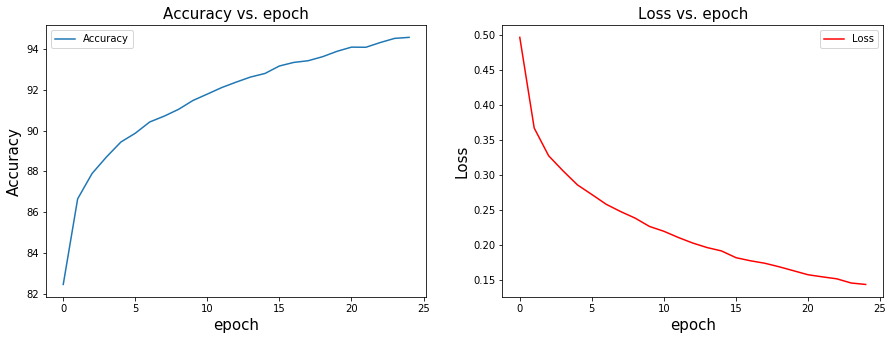

In [18]:
#include time details
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#fit training dataset into the model
classifier_e25_fit = classifier_e25.fit(X_train, y_train, epochs=25, verbose=0)
tt = time.time()-t1
dh.update(md("<br>Training is completed! Total training time: **{} seconds**".format(round(tt,3))))

display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#plot the graphs
#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,classifier_e25_fit.params['epochs']), [acc * 100 for acc in classifier_e25_fit.history['accuracy']], label='Accuracy')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#losso graph
ax[1].plot(range(0,classifier_e25_fit.params['epochs']), classifier_e25_fit.history['loss'], label='Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

To train our model we ran it for 25 epochs, we have plotted the graphs highlighting the trends of Accuracy and loss with respect to the number of epochs. <br><br>They detailed key inferences generated when we increase the number of epochs from 0 to 100 are mentioned below under the Areas of improvement. <br>



## Evaluation of ANN Model

In [19]:
#include timing information
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#evaluate the model for testing dataset
test_loss_e25 = classifier_e25.evaluate(X_test, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))

display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* Model Evaluation Summary \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate evaluation parameters
f1_e25 = f1_score(y_test, classifier_e25.predict_classes(X_test), average='micro')
roc_e25 = roc_auc_score(y_test, classifier_e25.predict_proba(X_test), multi_class='ovo')

#create evaluation dataframe
stats_e25 = pd.DataFrame({'Test accuracy' : round(test_loss_e25[1]*100,3),
                      'F1 score'      : round(f1_e25,3),
                      'ROC AUC score' : round(roc_e25,3),
                      'Total Loss'    : round(test_loss_e25[0],3)}, index=[0])

#print evaluation dataframe
display(stats_e25)

<br>Model evaluation is completed! Total evaluation time: **0.405 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* Model Evaluation Summary \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,88.85,0.888,0.991,0.399


<h2> Key Inferences</h2><br>
1. The test accuracy of our model is 88.25%.<br><br>
2. Our model has achieved an F1 score of 0.888. F1 scores range from the worst value 0 to the best value 1. The F1 score is the weighted average of the precison and recall. In our case, where we have a multiclass classification, the F1 score the average of average of the F1 score of each class.<br><br>
3. The AUC-ROC curve is a performance measure for classification problems. ROC is a probabbility curve and AUC represents degree or measure of separability. Wehave achieved and AUC-ROC score of 0.991<br><br>
4. The total loss for the test data is 0.399. 

## Area of Improvement

### 1) Cross Validation

The first improvement that we can add to our model is <b> Cross Validation</b>.<br>

Below we have made our cross validation function which takes in the value for number of epochs and thhe number of cross validation folds. We have kept the number of epochs constant at 25 and compare the performance of the model for the various values of cross validation folds.<br>

We comapare two values of Cross Validation folds namely 5 and 10. The performance of the model with cross validation on the train data for the respective values of folds is shown below the implementation.

In [244]:
def model_cv(epoch, cv):
    '''Function for cross validation'''
    
    #Model Initializing, Compiling and Fitting
    def build_classifier():
        classifier = Sequential()
        classifier.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
        classifier.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
        classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return classifier

    #model summary
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
    build_classifier().summary()

    #create KerasClassifier object
    classifier_cv = KerasClassifier(build_fn=build_classifier, batch_size=32, epochs=epoch, verbose=0)
    scoring = {'acc' : 'accuracy',
                    'f1'  : 'f1_micro',
                    'roc' : 'roc_auc_ovo',
                    'loss': 'neg_log_loss'}

    #include timing information
    dh = display('',display_id=True)
    dh.update(md("<br>Training is in progress....."))
    t1 = time.time()
    
    #perform cross validation
    scores = cross_validate(classifier_cv, X_train, y_train, cv=cv, scoring=scoring, verbose=0, return_train_score=True)
    tt = time.time()-t1
    dh.update(md("<br>Training is completed! Total training time: **{} seconds**".format(round(tt,3))))
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

    #plot graphs
    #accuracy graph
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
    ax = axes.ravel()
    ax[0].plot(range(1,len(scores['train_acc'])+1), [acc * 100 for acc in scores['train_acc']], label='Accuracy')
    ax[0].set_title('Accuracy vs. Cross Validation', fontsize=15)
    ax[0].set_ylabel('Accuracy', fontsize=15)
    ax[0].set_xlabel('Cross Validation', fontsize=15)
    ax[0].legend()

    #loss graph
    ax[1].plot(range(1,len(scores['train_loss'])+1), np.abs(scores['train_loss']), label='Loss', color='r')
    ax[1].set_title('Loss vs. Cross Validation', fontsize=15)
    ax[1].set_ylabel('Loss', fontsize=15)
    ax[1].set_xlabel('Cross Validation', fontsize=15)
    ax[1].legend()

    #display the graph
    plt.show()


    #Evaluating the model
    dh = display('',display_id=True)
    dh.update(md("<br><br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(np.sum(scores['score_time']),3))))

    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* Model Evaluation \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))
    
    #create the model evaluation dataframe
    stats = pd.DataFrame({'Test accuracy' : round(np.mean(scores['test_acc'])*100,3),
                          'F1 score'      : round(np.mean(scores['test_f1']),3), 
                          'ROC AUC score' : round(np.mean(scores['test_roc']),3),
                          'Total Loss'    : round(np.abs(np.mean(scores['test_loss'])),3)}, index=[0])
    #print the dataframe
    display(stats)

    #return the classifier and evaluation parameter details
    return scores, stats

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_194"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_447 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_448 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **630.967 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

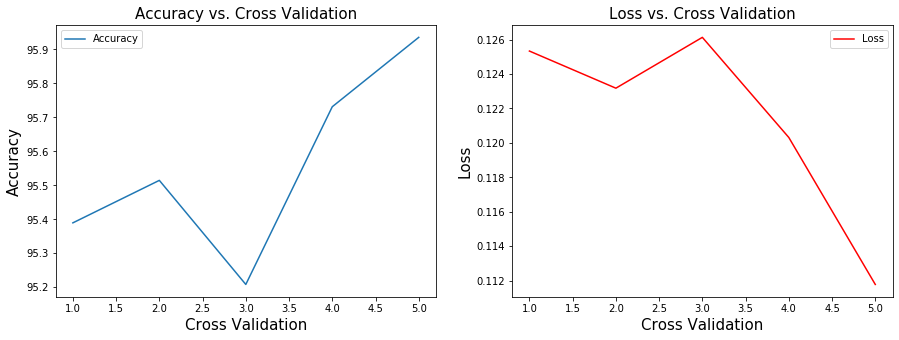

<br><br>Model evaluation is completed! Total evaluation time: **5.553 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* Model Evaluation \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,89.687,0.897,0.992,0.352


In [245]:
#run the model for 5-Fold cross validation
scores_5cv, stats_5cv = model_cv(epoch=25, cv=5)

<b>We have shown above the accuracy and loss of the model on the train data in the graphs for the model with 25 epochs and 5 fold cross validation<br>
We have also depicted the performance on the test data using the scoring metrics above.</b>

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_200"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_459 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_460 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **1938.588 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

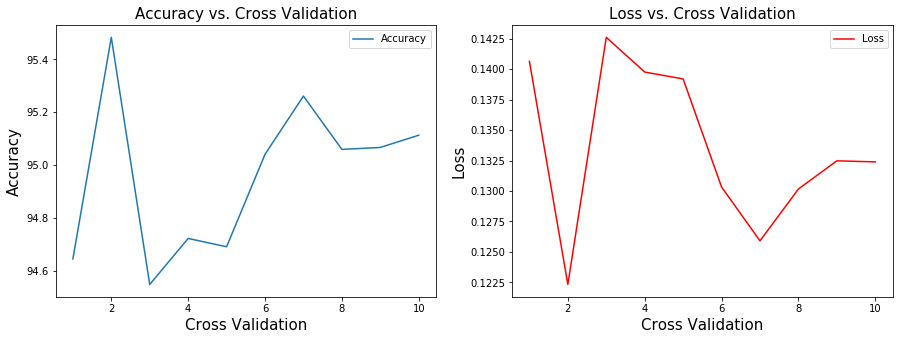

<br><br>Model evaluation is completed! Total evaluation time: **6.503 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* Model Evaluation \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,89.525,0.895,0.992,0.358


In [246]:
#run the model for 10-Fold cross validation
scores_10cv, stats_10cv = model_cv(epoch=25, cv=10)

<b>We have shown above the accuracy and loss of the model on the train data in the graphs for the model with 25 epochs and 10 fold cross validation<br>
We have also depicted the performance using the scoring metrics above.</b>

### Comparison between all models with varying Cross Validation folds

In [247]:
def add_value_labels(ax, spacing=5):
    '''add label details on each bar graph'''
    
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

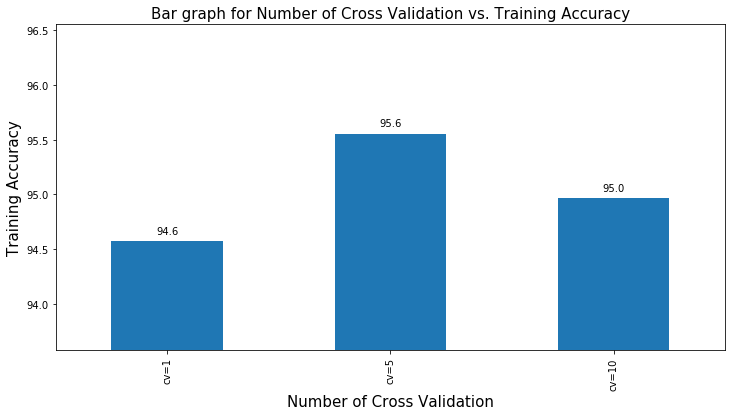

In [248]:
#Plot the graph
x_axis = ['cv=1', 'cv=5', 'cv=10']
y_axis = [classifier_e25_fit.history['accuracy'][-1]*100, np.mean(scores_5cv['train_acc']*100), np.mean(scores_10cv['train_acc']*100)]

#create series with y_axis values
freq_series = pd.Series(y_axis)

display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))                                    #figure size
ax = freq_series.plot(kind='bar')                             #plot the type of graph
plt.xlabel('Number of Cross Validation', fontsize=15)         #xlabel
plt.ylabel('Training Accuracy', fontsize=15)                  #ylabel
plt.ylim(min(y_axis)-1,max(y_axis)+1)                         #limit the y_axis dynamically
plt.title('Bar graph for Number of Cross Validation vs. Training Accuracy', fontsize=15)    #title
ax.set_xticklabels(x_axis)                                    #x-ticks

# Put labels on each bar graph
add_value_labels(ax)  

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

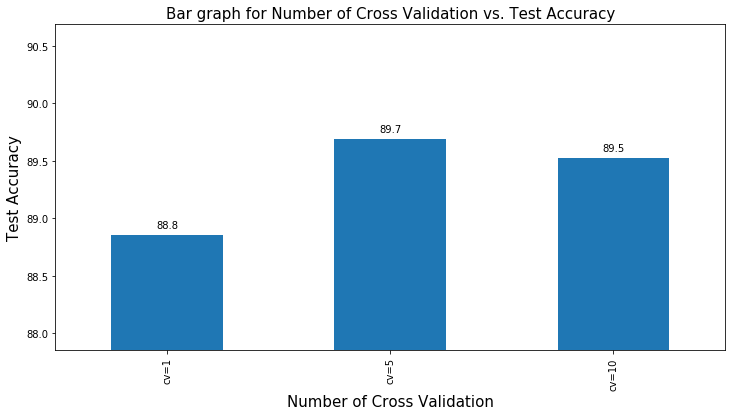

In [249]:
#Plot the graph
x_axis = ['cv=1', 'cv=5', 'cv=10']
y_axis = [stats_e25['Test accuracy'][0], stats_5cv['Test accuracy'][0], stats_10cv['Test accuracy'][0]]

#create series with y_axis values
freq_series = pd.Series(y_axis)

display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Number of Cross Validation', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for Number of Cross Validation vs. Test Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

# Put labels on each bar graph
add_value_labels(ax)

<h3> key Inferences</h3><br>
1. The accuracy of the model for the various folds depends on the distribution of the data. For eg :  If the model hasn't encountered enough images of Trousers in the training and encounters a large number of images trousers in the trousers in the validation set then the accuracy drops significantly for that fold.<br>
2. The accuracy of 5 fold cross validation is the highest for the train data.<br>
3. The accuarcy of 10 fold cross validation is the highest for the test data.<br>



### 2) Increasing number of epochs

Below we experiment by increasing the number of epochs from 25 to 50 to 100 to 200. We aim to keep the number of epochs as high as possible and terminate the training based on the error rate. If the accuracy reduces it means that our model is overfitting and we should limit the number of epochs.<br>
The comparison of the test and train accuracies with respect to the values of epochs is shown after the implementation.

In [11]:
def model_epcoh(epoch):
    '''Function to run Neural Network for different epochs'''
    
    #Model Initializing, Compiling and Fitting
    classifier = Sequential()
    classifier.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
    classifier.summary()

    #include timing details
    dh = display('',display_id=True)
    dh.update(md("<br>Training is in progress....."))
    t1 = time.time()
    #fit the model with training dataset
    classifier_fit = classifier.fit(X_train, y_train, epochs=epoch, verbose=0)
    tt = time.time()-t1
    dh.update(md("<br>Training is completed! Total training time: **{} seconds**".format(round(tt,3))))

    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

    #plot the graph
    #accuracy graph
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
    ax = axes.ravel()
    ax[0].plot(range(0,classifier_fit.params['epochs']), [acc * 100 for acc in classifier_fit.history['accuracy']], label='Accuracy')
    ax[0].set_title('Accuracy vs. epoch', fontsize=15)
    ax[0].set_ylabel('Accuracy', fontsize=15)
    ax[0].set_xlabel('epoch', fontsize=15)
    ax[0].legend()

    #loss graph
    ax[1].plot(range(0,classifier_fit.params['epochs']), classifier_fit.history['loss'], label='Loss', color='r')
    ax[1].set_title('Loss vs. epoch', fontsize=15)
    ax[1].set_ylabel('Loss', fontsize=15)
    ax[1].set_xlabel('epoch', fontsize=15)
    ax[1].legend()

    #display the graph
    plt.show()

    #Evaluating the model    
    dh = display('',display_id=True)
    dh.update(md("<br>Model evaluation is in progress..."))
    t2 = time.time()
    
    #model evaluation
    test_loss = classifier.evaluate(X_test, y_test, verbose=0)
    et = time.time()-t2
    dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

    #calculate the evaluation parameter
    f1 = f1_score(y_test, classifier.predict_classes(X_test), average='micro')
    roc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class='ovo')

    #create the model evaluation dataframe
    stats = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                          'F1 score'      : round(f1,3),
                          'ROC AUC score' : round(roc,3),
                          'Total Loss'    : round(test_loss[0],3)}, index=[0])
    
    #print the dataframe
    display(stats)
    
    #return the classifier and model evaluation details
    return classifier_fit, stats

### epochs=50

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **259.449 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

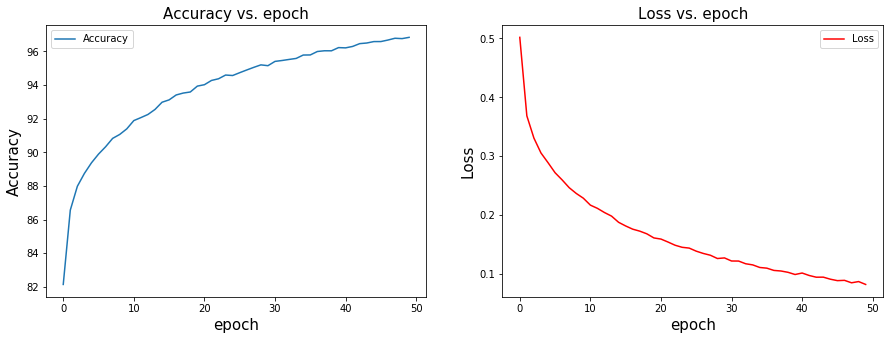

<br>Model evaluation is completed! Total evaluation time: **0.734 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,88.95,0.89,0.99,0.554


In [12]:
#run the model for 50 epochs
classifier_e50, stats_e50 = model_epcoh(50)

<b>We have shown above the impact of increasing the number of epochs to 50 on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### epochs=100

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **928.793 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

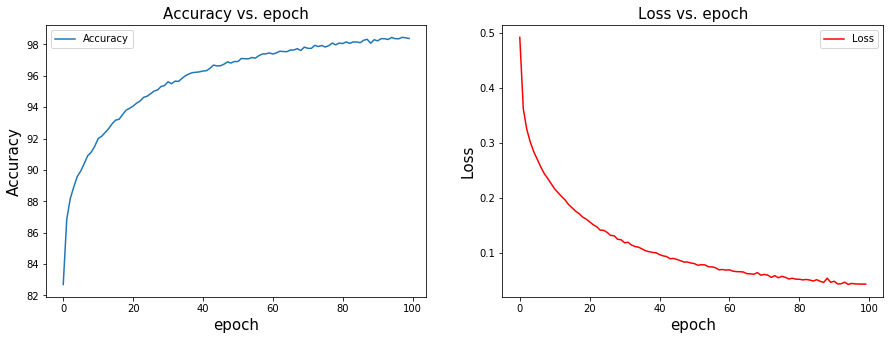

<br>Model evaluation is completed! Total evaluation time: **0.686 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,88.68,0.887,0.99,0.91


In [13]:
#run the model for 100 epochs
classifier_e100, stats_e100 = model_epcoh(100)

<b>We have shown above the impact of increasing the number of epochs to 100 on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### epochs=200

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **1471.012 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

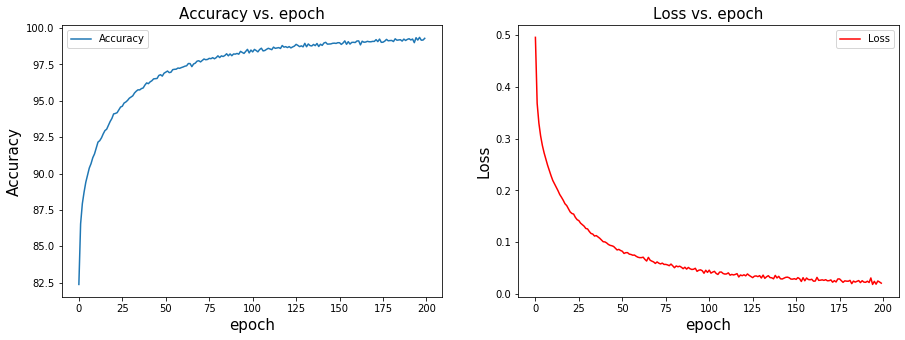

<br>Model evaluation is completed! Total evaluation time: **0.408 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,89.06,0.891,0.989,1.331


In [14]:
#run the model for 200 epochs
classifier_e200, stats_e200 = model_epcoh(200)

<b>We have shown above the impact of increasing the number of epochs to 200 on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### Comparison between all models with varying epoch values

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

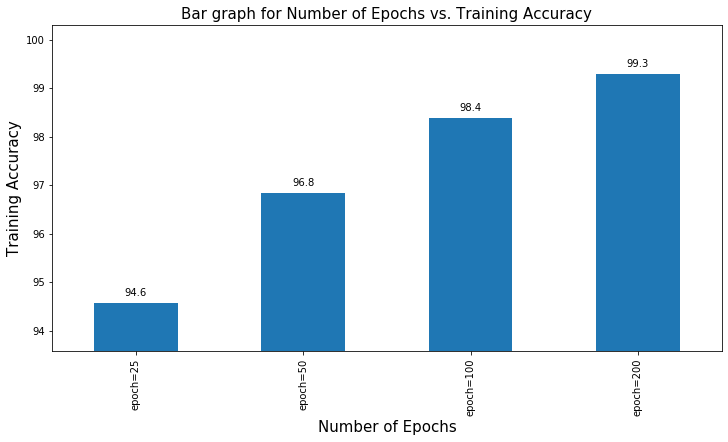

In [79]:
#Plot the graph
x_axis = ['epoch=25', 'epoch=50', 'epoch=100', 'epoch=200']
y_axis = [classifier_e25_fit.history['accuracy'][-1]*100, classifier_e50.history['accuracy'][-1]*100, classifier_e100.history['accuracy'][-1]*100, classifier_e200.history['accuracy'][-1]*100]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Number of Epochs', fontsize=15)
plt.ylabel('Training Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for Number of Epochs vs. Training Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

# add labels for each bar graph
add_value_labels(ax)

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

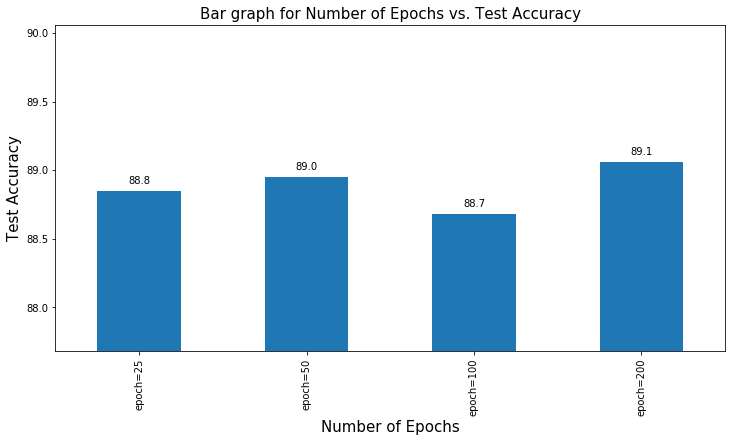

In [80]:
#Plot the graph
x_axis = ['epoch=25', 'epoch=50', 'epoch=100', 'epoch=200']
y_axis = [stats_e25['Test accuracy'][0], stats_e50['Test accuracy'][0], stats_e100['Test accuracy'][0], stats_e200['Test accuracy'][0]]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Number of Epochs', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for Number of Epochs vs. Test Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

#add labels for each bar graph
add_value_labels(ax)

<h3> key Inferences</h3><br>
1. The accuracy of the model with varying number of epochs depends on the error rate. As we've seen in the bar chart above, the training accuracy increases considerably with the increase of epochs.<br>
2. Although the training accuracy of model with 100 epochs is greater than the model with 50 epochs, the testing accuarcy doesn't reflect that.<br>
3. The accuracy of the model with 200 epochs is the highest for the train data.<br>
4. The accuarcy of the model with 200 epochs is the highest for the test data.<br>



### 3) Adding an extra Dense Layer

Artificial neural networks have two main hyperparameters that control the architecture of the network: the number of layers and the number of nodes in each hidden layer.<br>
In the Neural Network models below we add 1 and 2 new dense layers to our existing model and compare the performance of the model with 1, 2 and 3 dense layers.

### Neural Network (2 Dense Layer): 
<br>
<img src="2 dense.png" alt="drawing" width="600"/>

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **213.807 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

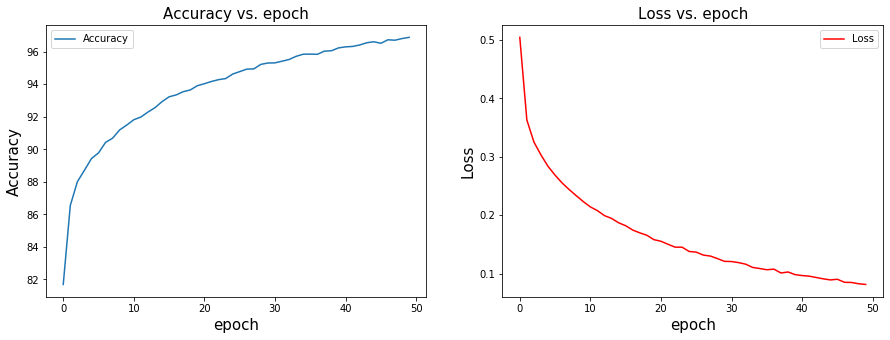

<br>Model evaluation is completed! Total evaluation time: **0.407 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,88.75,0.888,0.989,0.68


In [85]:
#Model Initializing, Compiling and Fitting
classifier_2dl = Sequential()
classifier_2dl.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
classifier_2dl.add(Dense(units = 128, kernel_initializer='uniform', activation='relu'))
classifier_2dl.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
classifier_2dl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_2dl.summary()

#include timing details
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#fit the model with training dataset
classifier_2dl_fit = classifier_2dl.fit(X_train, y_train, epochs=50, verbose=0)  #batch_size=32 (default)
tt = time.time()-t1
dh.update(md("<br>Training is completed! Total training time: **{} seconds**".format(round(tt,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#plot the graph
#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,classifier_2dl_fit.params['epochs']), [acc * 100 for acc in classifier_2dl_fit.history['accuracy']], label='Accuracy')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,classifier_2dl_fit.params['epochs']), classifier_2dl_fit.history['loss'], label='Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

#Evaluating the model
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#model evaluation
test_loss_2dl = classifier_2dl.evaluate(X_test, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate the model evaluation parameter
f1_2dl = f1_score(y_test, classifier_2dl.predict_classes(X_test), average='micro')
roc_2dl = roc_auc_score(y_test, classifier_2dl.predict_proba(X_test), multi_class='ovo')

#create the model evaluation dataframe
stats_2dl = pd.DataFrame({'Test accuracy' : round(test_loss_2dl[1]*100,3),
                      'F1 score'      : round(f1_2dl,3),
                      'ROC AUC score' : round(roc_2dl,3),
                      'Total Loss'    : round(test_loss_2dl[0],3)}, index=[0])

#print the dataframe
display(stats_2dl)

<b>We have shown above the impact of increasing the dense layers to 2 on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### Neural Network (3 Dense Layer): 
<br>
<img src="3 dense.png" alt="drawing" width="600"/>

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                2570      
Total params: 269,450
Trainable params: 269,450
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **628.014 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

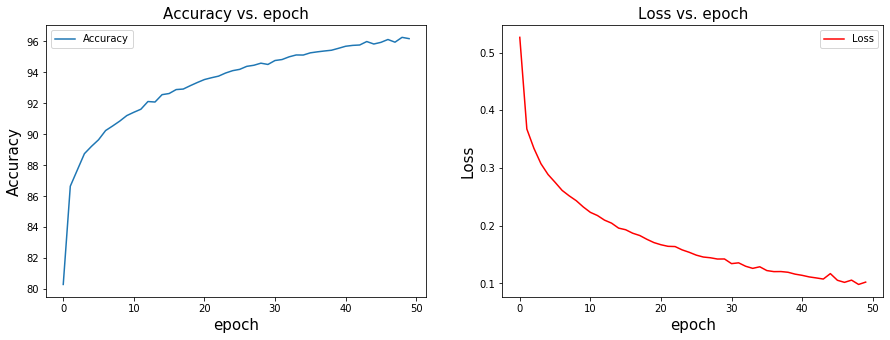

<br>Model evaluation is completed! Total evaluation time: **0.826 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,89.27,0.893,0.989,0.608


In [86]:
#Model Initializing, Compiling and Fitting
classifier_3dl = Sequential()
classifier_3dl.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
classifier_3dl.add(Dense(units = 128, kernel_initializer='uniform', activation='relu'))
classifier_3dl.add(Dense(units = 256, kernel_initializer='uniform', activation='relu'))
classifier_3dl.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
classifier_3dl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_3dl.summary()

#include timing details
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#fit the model with training dataset
classifier_3dl_fit = classifier_3dl.fit(X_train, y_train, epochs=50, verbose=0)  #batch_size=32 (default)
tt = time.time()-t1
dh.update(md("<br>Training is completed! Total training time: **{} seconds**".format(round(tt,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#plot the graph
#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,classifier_3dl_fit.params['epochs']), [acc * 100 for acc in classifier_3dl_fit.history['accuracy']], label='Accuracy')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,classifier_3dl_fit.params['epochs']), classifier_3dl_fit.history['loss'], label='Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

#Evaluate the model
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#model evaluation
test_loss_3dl = classifier_3dl.evaluate(X_test, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate the model evaluation parameter
f1_3dl = f1_score(y_test, classifier_3dl.predict_classes(X_test), average='micro')
roc_3dl = roc_auc_score(y_test, classifier_3dl.predict_proba(X_test), multi_class='ovo')

#create the model evaluation dataframe
stats_3dl = pd.DataFrame({'Test accuracy' : round(test_loss_3dl[1]*100,3),
                      'F1 score'      : round(f1_3dl,3),
                      'ROC AUC score' : round(roc_3dl,3),
                      'Total Loss'    : round(test_loss_3dl[0],3)}, index=[0])

#print the dataframe
display(stats_3dl)

<b>We have shown above the impact of increasing the dense layers to 3 on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### Comparison between all models with varying Dense layers

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

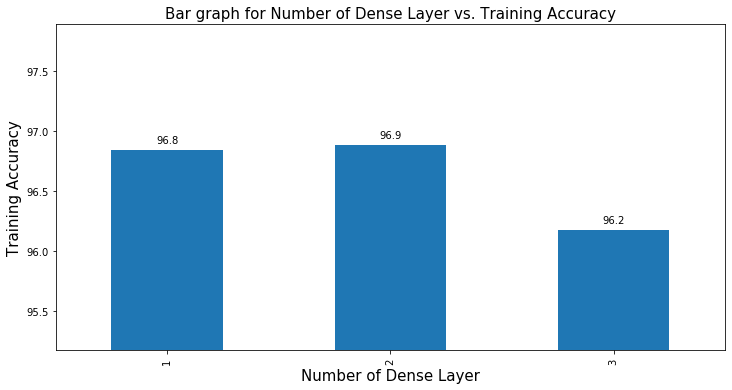

In [87]:
#Plot the graph
x_axis = ['1', '2', '3']
y_axis = [classifier_e50.history['accuracy'][-1]*100, classifier_2dl_fit.history['accuracy'][-1]*100, classifier_3dl_fit.history['accuracy'][-1]*100]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Number of Dense Layer', fontsize=15)
plt.ylabel('Training Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for Number of Dense Layer vs. Training Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

# add labels for each bar graph
add_value_labels(ax)

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

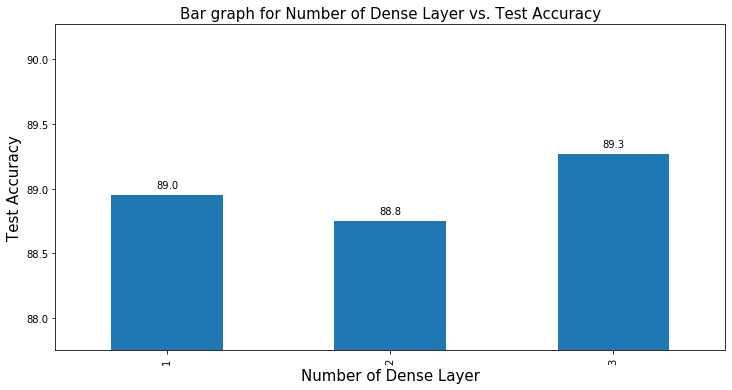

In [88]:
#Plot the graph
x_axis = ['1', '2', '3']
y_axis = [stats_e50['Test accuracy'][0], stats_2dl['Test accuracy'][0], stats_3dl['Test accuracy'][0]]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Number of Dense Layer', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for Number of Dense Layer vs. Test Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

# add labels for each bar graph
add_value_labels(ax)

<h3> key Inferences</h3><br>
1. The train accuracy is highest for the model with 2 dense layers.<br>
2. The test accuracy is highest for the model with 3 dense layers. <br>
3. We varied the number of nerurons or units in the new dense layers that we added to our original model.<br>



## 4) Dropout

<b>Dropout</b> is a regularization technique for neural network models. Dropout is a technique where we randomly selected neurons are ignored during training. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.<br><br>
Below we have performed and compared the performance of the models having dropout rates 0.1,0.2 and 0.3 respectively.

### Neural Network with Dropout: 
<br>
<img src="Dropout.png" alt="drawing" width="600"/>

In [106]:
def model_dropout(rate):
    '''Neural Network Model with Dropout'''
    
    #Model Initializing, Compiling and Fitting
    classifier = Sequential()
    classifier.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate = rate))
    classifier.add(Dense(units = 128, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate = rate))
    classifier.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    #model summary
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
    classifier.summary()

    #include timing details
    dh = display('',display_id=True)
    dh.update(md("<br>Training is in progress....."))
    t1 = time.time()
    
    #fit the model with training dataset
    classifier_fit = classifier.fit(X_train, y_train, epochs=50, verbose=0)
    tt = time.time()-t1
    dh.update(md("<br>Training is completed! Total training time: **{} seconds**".format(round(tt,3))))
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

    #plot the graph
    #accuracy graph
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
    ax = axes.ravel()
    ax[0].plot(range(0,classifier_fit.params['epochs']), [acc * 100 for acc in classifier_fit.history['accuracy']], label='Accuracy')
    ax[0].set_title('Accuracy vs. epoch', fontsize=15)
    ax[0].set_ylabel('Accuracy', fontsize=15)
    ax[0].set_xlabel('epoch', fontsize=15)
    ax[0].legend()

    #loss graph
    ax[1].plot(range(0,classifier_fit.params['epochs']), classifier_fit.history['loss'], label='Loss', color='r')
    ax[1].set_title('Loss vs. epoch', fontsize=15)
    ax[1].set_ylabel('Loss', fontsize=15)
    ax[1].set_xlabel('epoch', fontsize=15)
    ax[1].legend()

    #display the graph
    plt.show()

    #Evaluae the model
    dh = display('',display_id=True)
    dh.update(md("<br>Model evaluation is in progress..."))
    t2 = time.time()
    
    #model evaluation
    test_loss = classifier.evaluate(X_test, y_test, verbose=0)
    et = time.time()-t2
    dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

    #calculate the model evaluation parameters
    f1 = f1_score(y_test, classifier.predict_classes(X_test), average='micro')
    roc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class='ovo')

    #create model evaluation dataframe
    stats = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                          'F1 score'      : round(f1,3),
                          'ROC AUC score' : round(roc,3),
                          'Total Loss'    : round(test_loss[0],3)}, index=[0])
    
    #print the dataframe
    display(stats)
    
    #return the classifier and model evaluation details
    return classifier_fit, stats

### Dropout rate=0.1 and Dense Layer=2

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **344.517 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

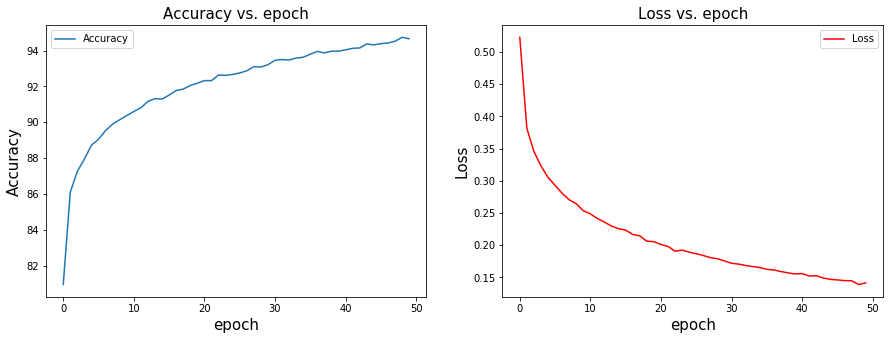

<br>Model evaluation is completed! Total evaluation time: **0.821 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,89.28,0.893,0.991,0.419


In [107]:
#run the neural network model with dropout with rate=0.1
classifier_1d, stats_1d = model_dropout(0.1)

<b>We have introduced dropout and shown the impact of dropurate rate = 0.1 on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### Dropout rate=0.2 and Dense Layer=2

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **604.334 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

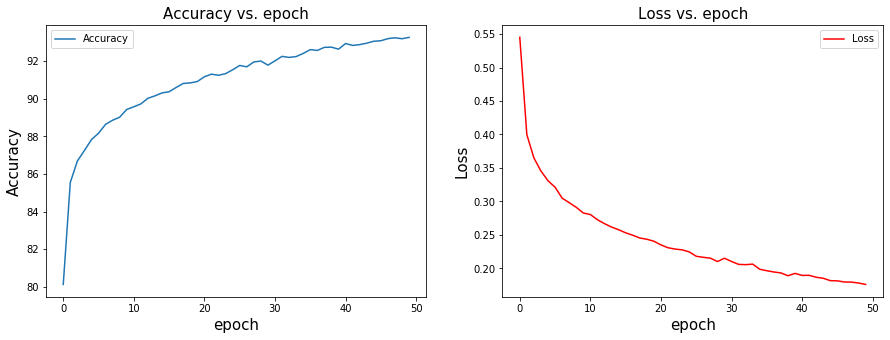

<br>Model evaluation is completed! Total evaluation time: **1.064 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,89.61,0.896,0.992,0.366


In [108]:
#run the neural network model with dropout with rate=0.2
classifier_2d, stats_2d = model_dropout(0.2)

<b>We have introduced dropout and shown the impact of dropurate rate = 0.2 on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### Dropout rate=0.3 and Dense Layer=2

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **600.14 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

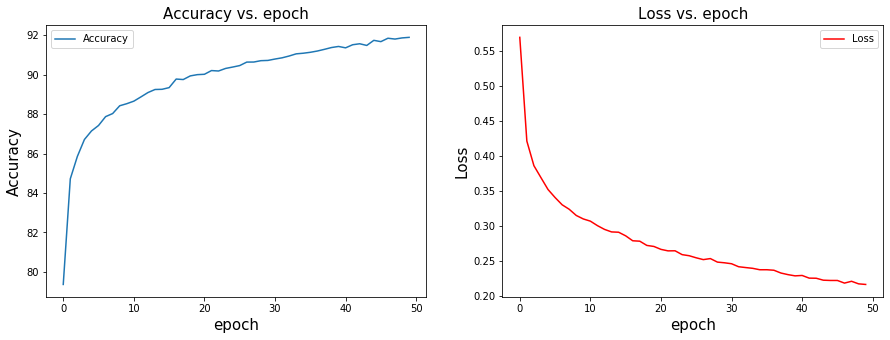

<br>Model evaluation is completed! Total evaluation time: **0.811 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,89.11,0.891,0.991,0.356


In [109]:
#run the neural network model with dropout with rate=0.3
classifier_3d, stats_3d = model_dropout(0.3)

<b>We have introduced dropout and shown the impact of dropurate rate = 0.3 on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### Comparison between all models with varying Dropout rates

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

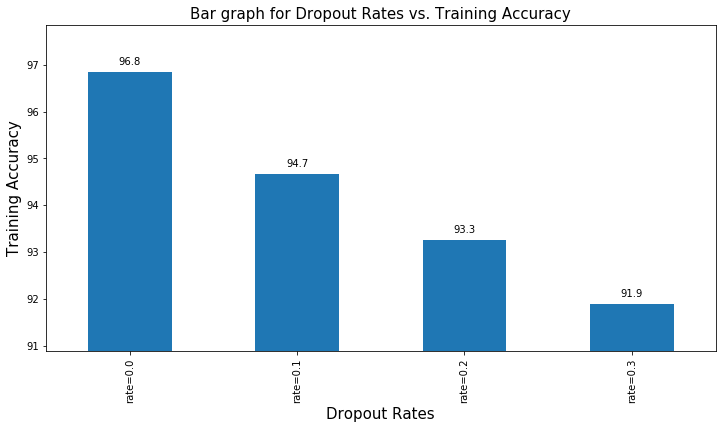

In [112]:
#Plot the model
x_axis = ['rate=0.0', 'rate=0.1', 'rate=0.2', 'rate=0.3']
y_axis = [classifier_e50.history['accuracy'][-1]*100, classifier_1d.history['accuracy'][-1]*100, classifier_2d.history['accuracy'][-1]*100, classifier_3d.history['accuracy'][-1]*100]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Dropout Rates', fontsize=15)
plt.ylabel('Training Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for Dropout Rates vs. Training Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

#add label for each graph
add_value_labels(ax)

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

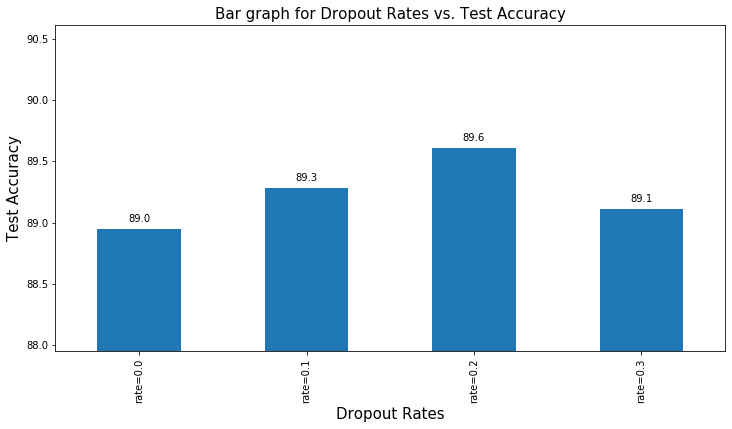

In [113]:
#Plotting
x_axis = ['rate=0.0', 'rate=0.1', 'rate=0.2', 'rate=0.3']
y_axis = [stats_e50['Test accuracy'][0], stats_1d['Test accuracy'][0], stats_2d['Test accuracy'][0], stats_3d['Test accuracy'][0]]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Dropout Rates', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for Dropout Rates vs. Test Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

#add label for each graph
add_value_labels(ax)

<h3> key Inferences</h3><br>
1. The train accuracy is highest for the model with a dropout rate of 0.0<br>
2. The test accuracy is highest for the model with a dropout rate of 0.2. <br>
3. Applying dropout before the last layer is not advised as the network has no ability to recitify the errors induced by dropout before the classification happens.<br>
4. Our network is relatively shallow compared to the dataset, hence reguariztaion may not have been required but we did it regardless to experiment.



## 5) Convolution Layer

CNN is a class of neural networks and have proven to have performed exceptionally on the image classification tasks. We now add demonstrate the use of a convolutional neural network for image classification. We vary the number of convolution layers from 1 to 3 and present the corresponding effect on the performance of the model.

### Convolution Neural Network: 
<br>
<img src="CNN layer.png" alt="drawing" width="600"/>

### Data Preparation

In [228]:
#read mnist dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

#reshape the dataframe
X_train=X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

#feature scaling
X_train=X_train / 255.0
X_test=X_test/255.0

#print the shape of each dataframe
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [135]:
def model_cnn(count=1):
    '''Convolution Neural Network'''
    
    #Model Initializing, Compiling and Fitting
    classifier = Sequential()
    
    #convolution layer
    classifier.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
    
    #max-pooling layer
    classifier.add(MaxPooling2D(2,2))
    
    #in case of multiple convolution layer
    if count>1:
        for i in range(count-1):
            classifier.add(Convolution2D(32, (3,3), activation='relu'))
            classifier.add(MaxPooling2D(2,2))
            
    #flatten layer
    classifier.add(Flatten())
    
    #fully connected layer
    #dense (hidden) layer
    classifier.add(Dense(units = 256, kernel_initializer='uniform', activation='relu'))
    
    #output layer
    classifier.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
    
    #compile the model
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    #model summary
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
    classifier.summary()

    #include timing details
    dh = display('',display_id=True)
    dh.update(md("<br>Training is in progress....."))
    t1 = time.time()
    
    #fit the model with training dataset
    classifier_fit = classifier.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    tt = time.time()-t1
    dh.update(md("<br>Training is completed! Total training time: **{} seconds**".format(round(tt,3))))
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

    #plot the graph
    #accuracy graph
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
    ax = axes.ravel()
    ax[0].plot(range(0,classifier_fit.params['epochs']), [acc * 100 for acc in classifier_fit.history['accuracy']], label='Accuracy')
    ax[0].set_title('Accuracy vs. epoch', fontsize=15)
    ax[0].set_ylabel('Accuracy', fontsize=15)
    ax[0].set_xlabel('epoch', fontsize=15)
    ax[0].legend()

    #loss graph
    ax[1].plot(range(0,classifier_fit.params['epochs']), classifier_fit.history['loss'], label='Loss', color='r')
    ax[1].set_title('Loss vs. epoch', fontsize=15)
    ax[1].set_ylabel('Loss', fontsize=15)
    ax[1].set_xlabel('epoch', fontsize=15)
    ax[1].legend()

    #display the graph
    plt.show()

    #Evaluate the model
    dh = display('',display_id=True)
    dh.update(md("<br>Model evaluation is in progress..."))
    t2 = time.time()
    
    #model evaluation
    test_loss = classifier.evaluate(X_test, y_test, verbose=0)
    et = time.time()-t2
    dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

    #calculate the model evaluation parameters
    f1 = f1_score(y_test, classifier.predict_classes(X_test), average='micro')
    roc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class='ovo')

    #create model evaluation dtaaframe
    stats = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                          'F1 score'      : round(f1,3),
                          'ROC AUC score' : round(roc,3),
                          'Total Loss'    : round(test_loss[0],3)}, index=[0])
    
    #print the dataframe
    display(stats)
    
    #return the classifier and model evaluation details
    return classifier_fit, stats

### Number of CNN layer = 1

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 256)               1384704   
_________________________________________________________________
dense_84 (Dense)             (None, 10)                2570      
Total params: 1,387,594
Trainable params: 1,387,594
Non-trainable params: 0
_________________________________________________________________


<br>Training is completed! Total training time: **1316.226 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

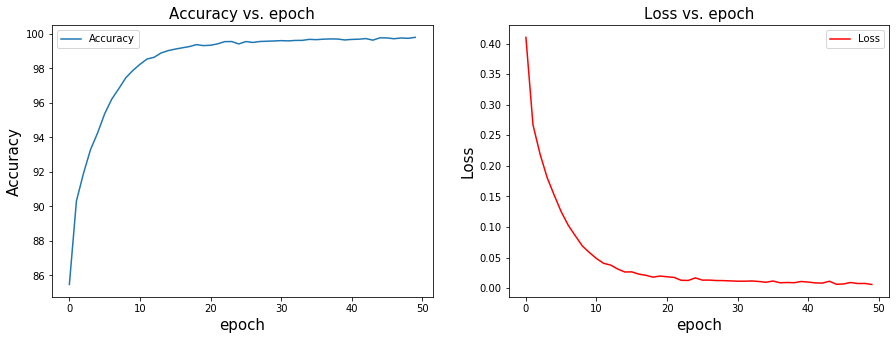

<br>Model evaluation is completed! Total evaluation time: **1.691 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,90.68,0.907,0.992,0.937


In [136]:
#run the CNN model with 1 layer
classifier_1cnn, stats_1cnn = model_cnn(1)

<b>We have introduced convolution layers and shown the impact of adding 1 convolution layer on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### Number of CNN layer = 2

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_86 (Dense)             (None, 10)              

<br>Training is completed! Total training time: **1122.251 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

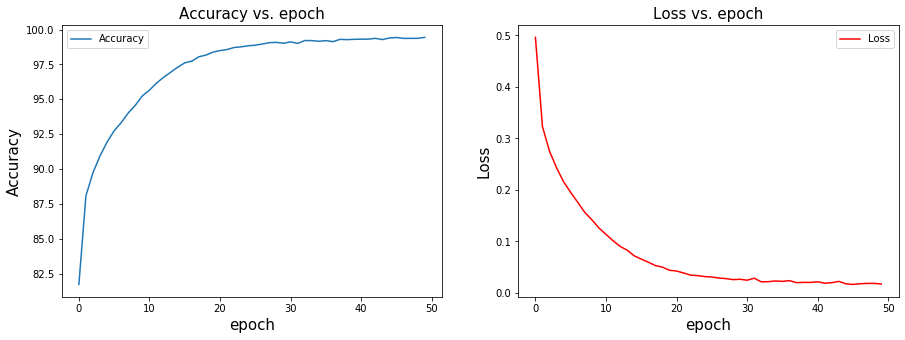

<br>Model evaluation is completed! Total evaluation time: **0.632 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,90.6,0.906,0.993,0.9


In [137]:
#run the CNN model with 2 layer
classifier_2cnn, stats_2cnn = model_cnn(2)

<b>We have introduced convolution layers and shown the impact of adding 2 convolution layers on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### Number of CNN layer = 3

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 32)              

<br>Training is completed! Total training time: **1098.832 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

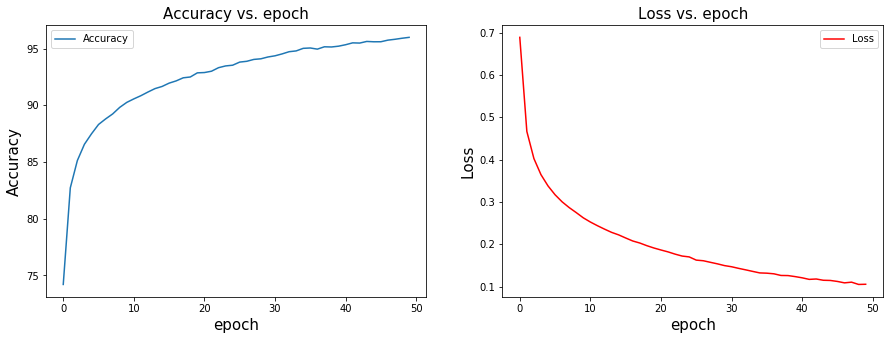

<br>Model evaluation is completed! Total evaluation time: **1.743 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,88.18,0.882,0.989,0.602


In [138]:
#run the CNN model with 3 layer
classifier_3cnn, stats_3cnn = model_cnn(3)

<b>We have introduced convolution layers and shown the impact of adding 3 convolution layers on accuracy and loss in the graphs above. <br>
We have also depicted the performance using the scoring metrics above.</b>

### Comparison between all models with varying number of CNN layers

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

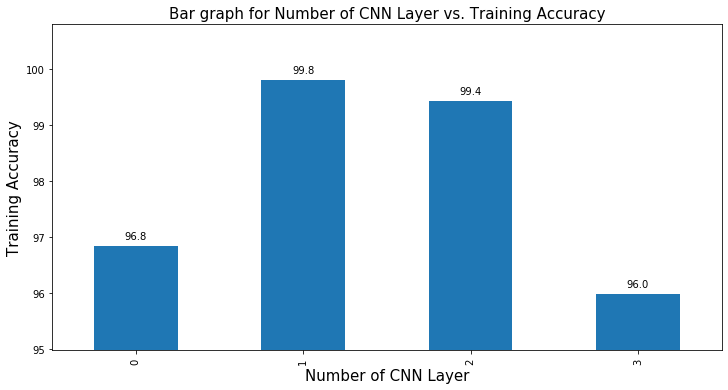

In [140]:
#Plot the graph
x_axis = ['0', '1', '2', '3']
y_axis = [classifier_e50.history['accuracy'][-1]*100, classifier_1cnn.history['accuracy'][-1]*100, classifier_2cnn.history['accuracy'][-1]*100, classifier_3cnn.history['accuracy'][-1]*100]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Number of CNN Layer', fontsize=15)
plt.ylabel('Training Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for Number of CNN Layer vs. Training Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

#add label for each graph
add_value_labels(ax)

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

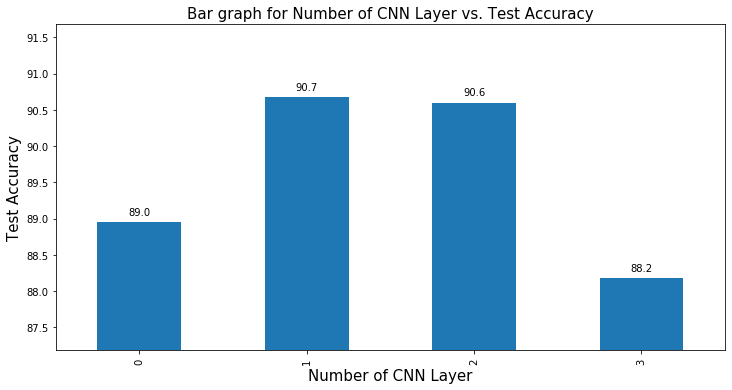

In [141]:
#Plot the graph
x_axis = ['0', '1', '2', '3']
y_axis = [stats_e50['Test accuracy'][0], stats_1cnn['Test accuracy'][0], stats_2cnn['Test accuracy'][0], stats_3cnn['Test accuracy'][0]]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Number of CNN Layer', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for Number of CNN Layer vs. Test Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

#add label for each graph
add_value_labels(ax)

<h2> Key Inferences </h2><br>
1. The highest accuracy for both test and train data is achieved for the neural network for 1 Convolution layer. <br>
2. We get a significant increase of 3% in train data accuracy when we add a convolution layer to our neural networ.<br>
3. The difference in the test accuracy for the model with 1 convolution layer and 2 convolution layer is 0.1% <br>
4. We can further improve the model by introducing the Dropout Layer in the fully connected layer.

## Comparison of all models mentioned above

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

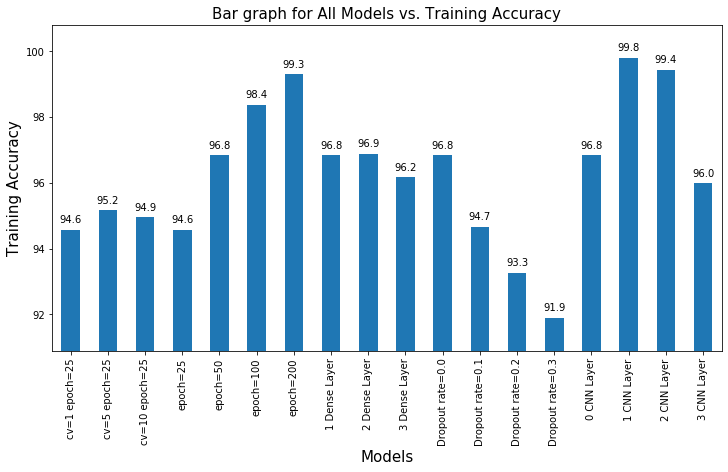

In [210]:
#Plot the graph
x_axis = ['cv=1 epoch=25', 
          'cv=5 epoch=25', 
          'cv=10 epoch=25', 
          'epoch=25', 
          'epoch=50', 
          'epoch=100', 
          'epoch=200', 
          '1 Dense Layer', 
          '2 Dense Layer', 
          '3 Dense Layer', 
          'Dropout rate=0.0', 
          'Dropout rate=0.1', 
          'Dropout rate=0.2', 
          'Dropout rate=0.3', 
          '0 CNN Layer', 
          '1 CNN Layer', 
          '2 CNN Layer', 
          '3 CNN Layer']
          
y_axis = [classifier_e25_fit.history['accuracy'][-1]*100, 
          np.mean(scores_5cv['train_acc']*100), 
          np.mean(scores_10cv['train_acc']*100),
          classifier_e25_fit.history['accuracy'][-1]*100, 
          classifier_e50.history['accuracy'][-1]*100, 
          classifier_e100.history['accuracy'][-1]*100, 
          classifier_e200.history['accuracy'][-1]*100,
          classifier_e50.history['accuracy'][-1]*100, 
          classifier_2dl_fit.history['accuracy'][-1]*100, 
          classifier_3dl_fit.history['accuracy'][-1]*100,
          classifier_e50.history['accuracy'][-1]*100, 
          classifier_1d.history['accuracy'][-1]*100, 
          classifier_2d.history['accuracy'][-1]*100, 
          classifier_3d.history['accuracy'][-1]*100,
          classifier_e50.history['accuracy'][-1]*100, 
          classifier_1cnn.history['accuracy'][-1]*100, 
          classifier_2cnn.history['accuracy'][-1]*100, 
          classifier_3cnn.history['accuracy'][-1]*100]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Training Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for All Models vs. Training Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

#add label for each graph
add_value_labels(ax)

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>

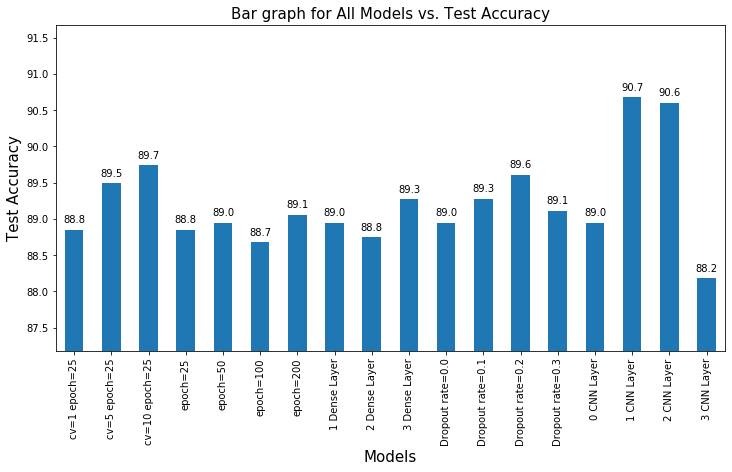

In [213]:
#Plot the model
x_axis = ['cv=1 epoch=25', 
          'cv=5 epoch=25', 
          'cv=10 epoch=25', 
          'epoch=25', 
          'epoch=50', 
          'epoch=100', 
          'epoch=200', 
          '1 Dense Layer', 
          '2 Dense Layer', 
          '3 Dense Layer', 
          'Dropout rate=0.0', 
          'Dropout rate=0.1', 
          'Dropout rate=0.2', 
          'Dropout rate=0.3', 
          '0 CNN Layer', 
          '1 CNN Layer', 
          '2 CNN Layer', 
          '3 CNN Layer']
          
y_axis = [stats_e25['Test accuracy'][0], 
          stats_5cv['Test accuracy'][0], 
          stats_10cv['Test accuracy'][0], 
          stats_e25['Test accuracy'][0], 
          stats_e50['Test accuracy'][0], 
          stats_e100['Test accuracy'][0], 
          stats_e200['Test accuracy'][0], 
          stats_e50['Test accuracy'][0], 
          stats_2dl['Test accuracy'][0], 
          stats_3dl['Test accuracy'][0], 
          stats_e50['Test accuracy'][0], 
          stats_1d['Test accuracy'][0], 
          stats_2d['Test accuracy'][0], 
          stats_3d['Test accuracy'][0], 
          stats_e50['Test accuracy'][0], 
          stats_1cnn['Test accuracy'][0], 
          stats_2cnn['Test accuracy'][0], 
          stats_3cnn['Test accuracy'][0]]

#create series with y_axis values
freq_series = pd.Series(y_axis)

#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Graph Plot    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br><br>'))
plt.figure(figsize=(12,6))
ax = freq_series.plot(kind='bar')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=15)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title('Bar graph for All Models vs. Test Accuracy', fontsize=15)
ax.set_xticklabels(x_axis)

#add label for each graph
add_value_labels(ax)

<h2> Key Inferences </h2><br>
1. As we can see above that the CNN model with 1 convolution layers achieves the highest accuracy on the train and test data.<br>
2. For the test data we can see that we increase the number of epochs the accuracy increases, but only upto a certain threshold after which the accuracy starts decreasing. <br>
3. The model with 3 CNN layers achieves the lowest accuracy of 88.2%. <br>
4. With the increase in the dropout rate from 0.0 to 0.3, the accuracy decreases.

## Grid-Search

Grid search is a model hyperparameter optimization technique. One of the biggest task in neural networks is tuning and hyperparameters and finding the values that suit our data and task.<br>
We have implemeneted grid search pertaining to our dataset to find the ideal number of batch size between 10 and 32 and the the ideal optimizer between 'adam' and 'rmsprop'.<br>
The results of this experiement are shown below the implementation.



In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Flatten())
    classifier.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units = 128, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
    classifier.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return classifier

In [232]:
classifier = KerasClassifier(build_fn=build_classifier)
parameters = {'batch_size' : [10,32],
              'epochs'     : [25],
              'optimizer'  : ['adam', 'rmsprop']}
grid = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=5, verbose=0)

dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()
grid = grid.fit(X_train, y_train, verbose=0)
tt = time.time()-t1
dh.update(md("<br>Training is completed! Total training time: **{} seconds**".format(round(tt,3))))

<br>Training is completed! Total training time: **4560.462 seconds**

In [265]:
best_parameters = grid.best_params_
print('Best Parameter: ',best_parameters)

Best Parameter:  {'batch_size': 32, 'epochs': 25, 'optimizer': 'adam'}


In [266]:
best_score = grid.best_score_
print('Best Score: ',round(best_score,3)*100)

Best Score:  89.5


<h2> Key Inferences </h2><br>
1. We have thus implemented grid search and found that the model with a batch size of 32, 25 epochs and adam optimizer achieves the highest accuracy. <br>
2. We have achieved testing accuracy of 89.5% for the ideal model.

<h2> Conclusion</h2><br>
In this project we have successfully demonstrated the use of an artificial neural network for the purpose of classfication. We then proceeded to ramp up our model by expermenting and adding various features and tuning the hyperparameters. The effect of these subtle changes to the model were shown and evaluated based on the various evaluation metrics. We also implemented a convolutional neural network which is well known for it's image classification abilities. 



<h2> Acknowledgment </h2><br>
We would like to express our gratitude to Dr. Timothy Havens, who helped us along the project with his insightful notes and lectures. We would also like to thank the TAs for their guidance in moments of difficulty.

<h2>References</h2>


1. Prof. Timothy Haven’s Lecture Notes.<br>
2. stackoverflow.com<br>
3. towardsdatascience.com<br>
4. keras.io documenation<br>